In [36]:
import gensim
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
from nltk.data import find
import string
import nltk
from bokeh.layouts import column
from bokeh.models.widgets import Button
from bokeh.events import ButtonClick
from matplotlib.widgets import Button
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook, output_file
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool, ColumnDataSource
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
# Load data from CSV files
df_1 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_1.csv",dtype={ 'content': 'str'})
df_2 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_2.csv",dtype={'content': 'str'})
df_3 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_3.csv",dtype={'content': 'str'})
df_4 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_4.csv",dtype={'content': 'str'})
df_5 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_5.csv", dtype={'content': 'str'})
df_6 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_6.csv",dtype={ 'content': 'str'})
df_7 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_7.csv",dtype={'content': 'str'})
df_8 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_8.csv",dtype={'content': 'str'})
df_9 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_9.csv",dtype={'content': 'str'})
df_10 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_10.csv",dtype={'content': 'str'})
df_11 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_11.csv",dtype={'content': 'str'})
df_12 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_12.csv",dtype={'content': 'str'})
df_13 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_13.csv",dtype={'content': 'str'})

C:\Users\bhagy\AppData\Local\Temp\ipykernel_5816\3687364286.py:6: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_5.csv", dtype={'content': 'str'})
C:\Users\bhagy\AppData\Local\Temp\ipykernel_5816\3687364286.py:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_10 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_10.csv",dtype={'content': 'str'})
C:\Users\bhagy\AppData\Local\Temp\ipykernel_5816\3687364286.py:13: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_12 = pd.read_csv(r"C:\Users\bhagy\Downloads\IRAhandle_tweets_12.csv",dtype={'content': 'str'})


In [4]:
# Combine the two dataframes if needed
combined_df = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13 ], ignore_index=True)
# Drop rows with NaN values in the 'content' column

In [5]:
combined_df['content'] = combined_df['content'].fillna('')


In [6]:
# Tokenize and preprocess tweets
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


In [7]:
def preprocess_tweet(tweet):
    tokens = word_tokenize(tweet)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]  # Remove stopwords and punctuation
    return tokens


In [8]:
# Apply preprocessing to each tweet in the combined dataframe
combined_df['tokens'] = combined_df['content'].apply(preprocess_tweet)

# Train Word2Vec model
model = Word2Vec(sentences=combined_df['tokens'], vector_size=100, window=5, min_count=1, workers=4)


In [9]:
# Save the trained model
model.save('word2vec_model.model')


In [10]:
# To load the trained model later
loaded_model = Word2Vec.load('word2vec_model.model')


In [11]:

# Get the vector representation of a word
vector = model.wv['trump']
#similar = model.wv.most_similar('bad')
#print("Vector representation of 'trump':", vector)


In [12]:
# Load pre-trained word embeddings 
nltk.download('word2vec_sample')
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pretrained_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)


[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\bhagy\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


In [13]:
pretrained_model.most_similar(positive=['politics'], topn = 300)

[('Politics', 0.6740255355834961),
 ('political', 0.6718930006027222),
 ('politicians', 0.5705572366714478),
 ('politician', 0.5695300698280334),
 ('politicking', 0.5680171847343445),
 ('discourse', 0.5312308073043823),
 ('politic', 0.5113316178321838),
 ('ideology', 0.5106319189071655),
 ('polity', 0.49748390913009644),
 ('politicos', 0.4961282014846802),
 ('politico', 0.4957806468009949),
 ('pragmatism', 0.48978298902511597),
 ('mudslinging', 0.48864585161209106),
 ('divisive', 0.4878556728363037),
 ('Political', 0.48223698139190674),
 ('activism', 0.47763800621032715),
 ('ideological', 0.4742620587348938),
 ('politically', 0.47350430488586426),
 ('liberalism', 0.46202588081359863),
 ('religion', 0.46033328771591187),
 ('economics', 0.4602351784706116),
 ('nationalism', 0.4569498896598816),
 ('polemics', 0.4543820023536682),
 ('rhetoric', 0.4528999328613281),
 ('conservatism', 0.452168345451355),
 ('statesmanship', 0.45155686140060425),
 ('ideologies', 0.4471098482608795),
 ('elector

In [76]:
# Select a subset of words for spectral clustering
# Select a subset of words for spectral clustering
words = ['democracy','trump','democratic', 'republic', 'dictatorship', 'totalitarianism', 'anarchy', 'government', 'constitution', 'parliament', 'congress', 'senate', 'legislature', 'judiciary', 'executive', 'president', 'governor', 'minister', 'election', 'campaign', 'vote', 'ballot', 'candidate', 'party', 'platform', 'debate', 'policy', 'law', 'bill', 'amendment', 'referendum', 'suffrage', 'citizenship', 'nationalism', 'federalism', 'state', 'municipality', 'bureaucracy', 'regulation', 'taxation', 'budget', 'welfare', 'subsidy', 'sanction', 'diplomacy', 'treaty', 'conflict', 'war', 'peace', 'negotiation', 'arbitration', 'resolution', 'protest', 'movement', 'rights', 'freedom', 'liberty', 'justice', 'equality', 'equity', 'diversity', 'inclusion', 'representation', 'constituency', 'district', 'caucus', 'majority', 'minority', 'coalition', 'opposition', 'ideology', 'conservatism', 'liberalism', 'socialism', 'communism', 'capitalism', 'nationalism',  'secularism', 'pluralism', 'patriotism', 'sovereignty', 'autonomy', 'imperialism', 'revolution', 'coup',   'radicalism', 'moderation', 'diplomat', 'ambassador', 'consul',  'intelligence', 'espionage', 'surveillance', 'humanitarian',  'activism', 'advocacy', 'petition', 'boycott', 'strike', 'rally', 'march', 'demonstration', 'riot', 'insurrection', 'rebellion', 'guerrilla', 'militia', 'conflict', 'warfare', 'arms', 'military', 'soldier', 'army', 'navy', 'marine', 'commander', 'general',  'veteran', 'casualty', 'truce', 'armistice', 'disarmament', 'treaty', 'summit', 'conference', 'protocol', 'accord', 'agreement', 'compact', 'pact',  'broker', 'delegate', 'representative', 'diplomatic', 'embassy', 'consulate', 'mission', 'visa', 'passport', 'immunity',  'refugee', 'border', 'territory', 'region', 'province', 'county', 'city','town', 'rural', 'urban', 'metropolitan', 'capital', 'municipality', 'district', 'zone', 'area', 'locale', 'community', 'society', 'population', 'census', 'quota', 'minority', 'majority', 'group']
embeddings = [pretrained_model[word] for word in words]
embeddings_array = np.array(embeddings)



In [77]:
# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_array)

In [78]:
# Print the similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[1.         0.09243032 0.8644481  ... 0.21984479 0.17262217 0.08352153]
 [0.09243032 0.9999999  0.09732292 ... 0.08824506 0.12511764 0.05145609]
 [0.8644481  0.09732292 1.         ... 0.27058405 0.20325762 0.06255151]
 ...
 [0.21984479 0.08824506 0.27058405 ... 1.0000002  0.614022   0.30903277]
 [0.17262217 0.12511764 0.20325762 ... 0.614022   1.0000001  0.25058454]
 [0.08352153 0.05145609 0.06255151 ... 0.30903277 0.25058454 1.        ]]


In [80]:
from bokeh.palettes import Category10  
# Perform hierarchical clustering
# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_representation = tsne.fit_transform(similarity_matrix)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_representation)

# Assign distinct colors to each cluster
cluster_colors = [Category10[10][i] for i in cluster_labels]

# Create Bokeh figure
plot = figure(width=800, height=600, title='t-SNE Scatter Plot with Colored Clusters')

# Scatter plot with colored clusters
source = ColumnDataSource(data=dict(x=tsne_representation[:, 0], y=tsne_representation[:, 1], label=cluster_labels, color=cluster_colors, word=words))
scatter = plot.scatter(x='x', y='y', source=source, size=10, color='color', legend_field='label', fill_alpha=0.6)

# Annotate points with words
labels = plot.text(x='x', y='y', text='word', source=source, text_font_size='8pt', text_align='center', text_baseline='middle')

# Add legend outside the plot
plot.legend.title = 'Clusters'
plot.legend.label_text_font_size = '10pt'
plot.legend.location = 'top_right'

# Create layout
layout = column( plot)

# Show the plot
show(layout)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


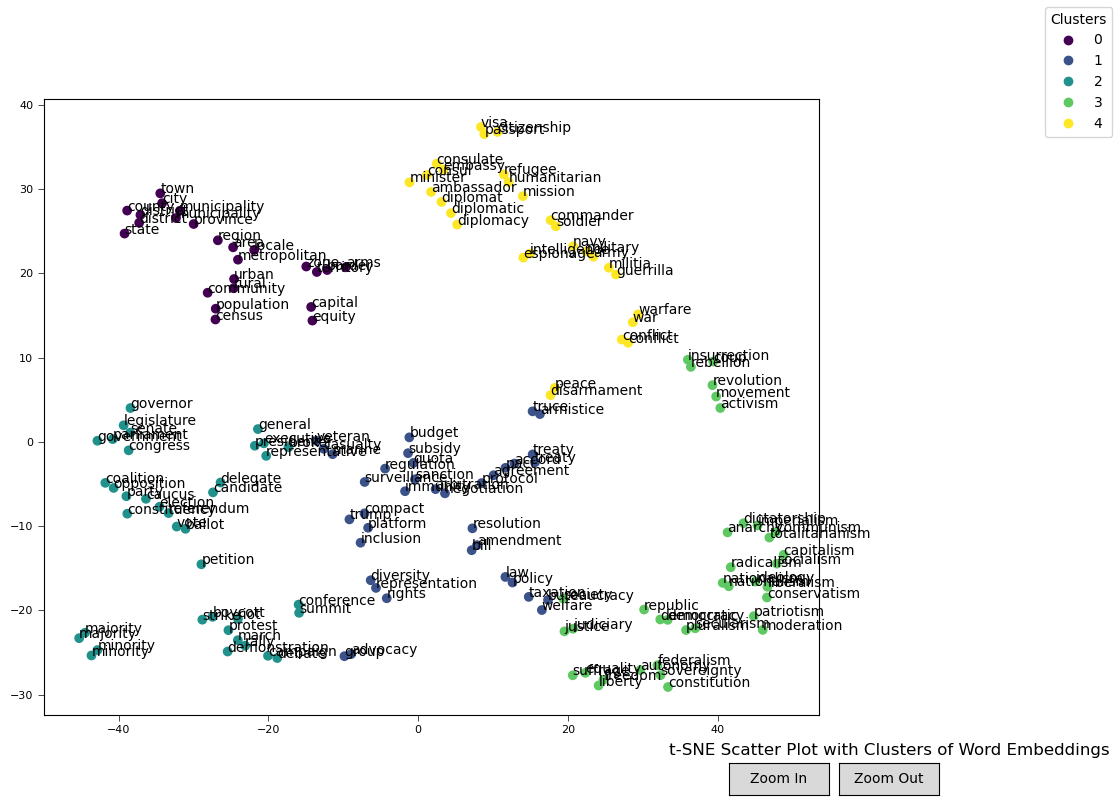

In [79]:

# Perform hierarchical clustering
# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_representation = tsne.fit_transform(similarity_matrix)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_representation)

# Scatter plot with clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=cluster_labels, cmap='viridis', label='Word Embeddings')

# Annotate points with words
for i, word in enumerate(words):
    ax.annotate(word, (tsne_representation[i, 0], tsne_representation[i, 1]))
# Add legend outside the plot
fig.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')

# Define zoom functions
def zoom_in(event):
    ax.set_xlim(ax.get_xlim() * 0.9)
    ax.set_ylim(ax.get_ylim() * 0.9)
    fig.canvas.draw()

def zoom_out(event):
    ax.set_xlim(ax.get_xlim() * 1.1)
    ax.set_ylim(ax.get_ylim() * 1.1)
    fig.canvas.draw()

# Add zoom buttons
axzoomin = plt.axes([0.81, 0.01, 0.1, 0.04])
axzoomout = plt.axes([0.92, 0.01, 0.1, 0.04])
button_zoomin = Button(axzoomin, 'Zoom In')
button_zoomout = Button(axzoomout, 'Zoom Out')

button_zoomin.on_clicked(zoom_in)
button_zoomout.on_clicked(zoom_out)
# Adjust x-axis and y-axis tick parameters
ax.tick_params(axis='x', labelsize=8, length=4, width=0.5)
ax.tick_params(axis='y', labelsize=8, length=4, width=0.5)

plt.title('t-SNE Scatter Plot with Clusters of Word Embeddings')
plt.show()

In [18]:
# Select a subset of words for spectral clustering
words = ['democracy','trump','hillary','clinton','terrorist','democratic','republican', 'republic', 'monarchy', 'autocracy', 'oligarchy', 'dictatorship', 'totalitarianism', 'anarchy', 'government', 'constitution', 'parliament', 'congress', 'senate', 'legislature', 'judiciary', 'executive', 'president', 'governor', 'minister', 'election', 'campaign', 'vote', 'ballot', 'candidate', 'party', 'platform', 'debate', 'policy', 'law', 'bill', 'amendment', 'referendum', 'plebiscite', 'suffrage', 'citizenship', 'nationalism', 'federalism', 'state', 'municipality', 'bureaucracy', 'regulation', 'taxation', 'budget', 'welfare', 'subsidy', 'sanction', 'diplomacy', 'treaty', 'conflict', 'war', 'peace', 'negotiation', 'mediation', 'arbitration', 'resolution', 'protest', 'movement', 'rights', 'freedom', 'liberty', 'justice', 'equality', 'equity', 'diversity', 'inclusion', 'representation', 'constituency', 'district', 'quorum', 'caucus', 'majority', 'minority', 'coalition', 'opposition', 'ideology', 'conservatism', 'liberalism', 'socialism', 'communism', 'capitalism', 'fascism', 'nationalism', 'populism', 'globalization', 'secularism', 'theocracy', 'pluralism', 'patriotism', 'sovereignty', 'autonomy', 'annexation', 'colonization', 'imperialism', 'revolution', 'coup', 'insurgency', 'terrorism', 'extremism', 'radicalism', 'moderation', 'diplomat', 'ambassador', 'envoy', 'consul', 'attaché', 'intelligence', 'espionage', 'surveillance', 'humanitarian', 'ngo',  'activism', 'lobbying', 'advocacy', 'petition', 'boycott', 'strike', 'rally', 'march', 'demonstration', 'riot', 'insurrection', 'rebellion', 'guerrilla', 'militia', 'conflict', 'warfare', 'arms', 'military', 'soldier', 'army', 'navy', 'marine', 'commander', 'general', 'admiral', 'veteran', 'casualty', 'truce', 'ceasefire', 'armistice', 'disarmament', 'nonproliferation', 'treaty', 'summit', 'conference', 'protocol', 'accord', 'agreement', 'compact', 'pact', 'negotiator', 'mediator', 'arbitrator', 'facilitator', 'peacemaker', 'broker', 'delegate', 'representative', 'diplomatic', 'embassy', 'consulate', 'mission', 'visa', 'passport', 'immunity', 'extradition', 'asylum', 'refugee', 'border', 'territory', 'region', 'province', 'county', 'city','town', 'rural', 'urban', 'metropolitan', 'capital', 'municipality', 'district', 'zone', 'area', 'locale', 'community', 'society', 'population', 'demographics', 'census', 'quota', 'minority', 'majority', 'group']
embeddings = [model.wv[word] for word in words]
embeddings_array = np.array(embeddings)


In [19]:
# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_array)

In [20]:
# Print the similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[1.         0.542545   0.486991   ... 0.4378706  0.5910888  0.39922723]
 [0.542545   0.99999994 0.7132064  ... 0.48483622 0.4965147  0.54426926]
 [0.486991   0.7132064  1.         ... 0.4352735  0.4428204  0.4907444 ]
 ...
 [0.4378706  0.48483622 0.4352735  ... 0.9999998  0.69078076 0.5824667 ]
 [0.5910888  0.4965147  0.4428204  ... 0.69078076 1.0000002  0.4235327 ]
 [0.39922723 0.54426926 0.4907444  ... 0.5824667  0.4235327  0.9999998 ]]


C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


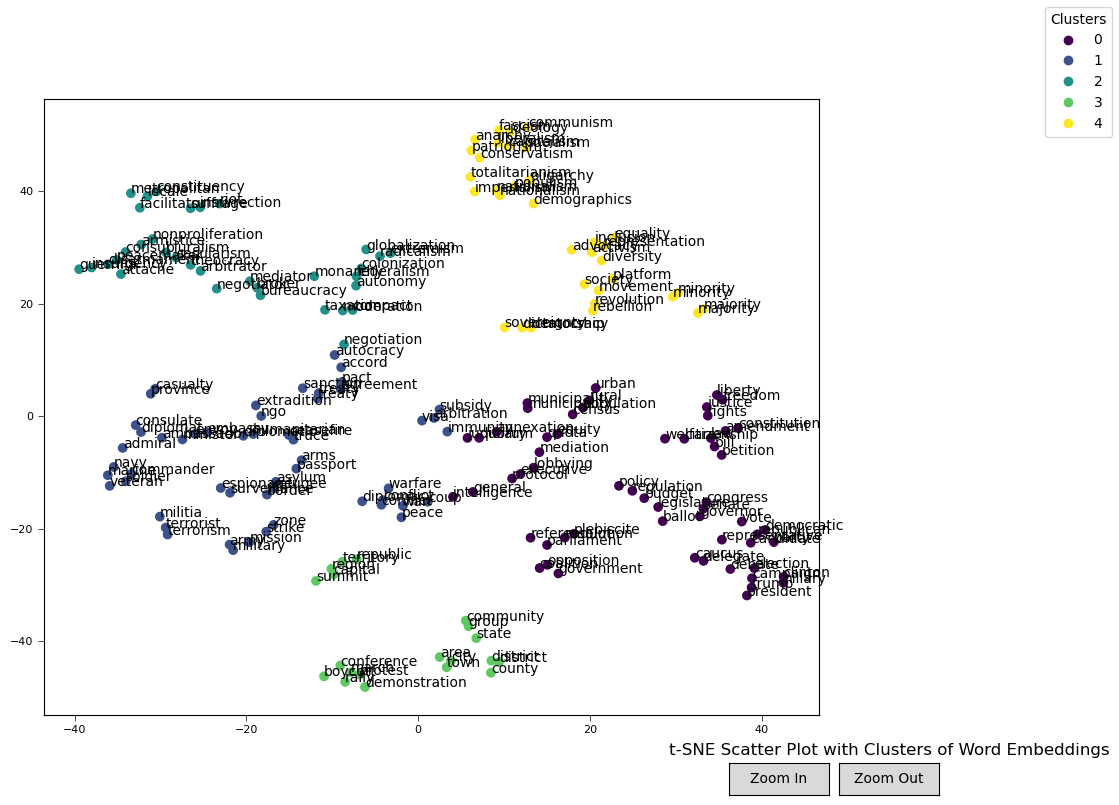

In [25]:

# Perform hierarchical clustering
# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_representation = tsne.fit_transform(similarity_matrix)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_representation)

# Scatter plot with clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=cluster_labels, cmap='viridis', label='Word Embeddings')

# Annotate points with words
for i, word in enumerate(words):
    ax.annotate(word, (tsne_representation[i, 0], tsne_representation[i, 1]))
# Add legend outside the plot
fig.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')

# Define zoom functions
def zoom_in(event):
    ax.set_xlim(ax.get_xlim() * 0.6)
    ax.set_ylim(ax.get_ylim() * 0.6)
    fig.canvas.draw()

def zoom_out(event):
    ax.set_xlim(ax.get_xlim() * 1.1)
    ax.set_ylim(ax.get_ylim() * 1.1)
    fig.canvas.draw()

# Add zoom buttons
axzoomin = plt.axes([0.81, 0.01, 0.1, 0.04])
axzoomout = plt.axes([0.92, 0.01, 0.1, 0.04])
button_zoomin = Button(axzoomin, 'Zoom In')
button_zoomout = Button(axzoomout, 'Zoom Out')

button_zoomin.on_clicked(zoom_in)
button_zoomout.on_clicked(zoom_out)
# Adjust x-axis and y-axis tick parameters
ax.tick_params(axis='x', labelsize=8, length=4, width=0.5)
ax.tick_params(axis='y', labelsize=8, length=4, width=0.5)

plt.title('t-SNE Scatter Plot with Clusters of Word Embeddings')
plt.show()

In [40]:
from bokeh.palettes import Category10  
# Perform hierarchical clustering
# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_representation = tsne.fit_transform(similarity_matrix)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_representation)

# Assign distinct colors to each cluster
cluster_colors = [Category10[10][i] for i in cluster_labels]

# Create Bokeh figure
plot = figure(width=800, height=600, title='t-SNE Scatter Plot with Colored Clusters')

# Scatter plot with colored clusters
source = ColumnDataSource(data=dict(x=tsne_representation[:, 0], y=tsne_representation[:, 1], label=cluster_labels, color=cluster_colors, word=words))
scatter = plot.scatter(x='x', y='y', source=source, size=10, color='color', legend_field='label', fill_alpha=0.6)

# Annotate points with words
labels = plot.text(x='x', y='y', text='word', source=source, text_font_size='8pt', text_align='center', text_baseline='middle')

# Add legend outside the plot
plot.legend.title = 'Clusters'
plot.legend.label_text_font_size = '10pt'
plot.legend.location = 'top_right'

# Create layout
layout = column( plot)

# Show the plot
show(layout)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
output_notebook()
plot_tfidf = bp.figure(width=700, height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)


Loading BokehJS ...

In [27]:
# getting a list of word vectors. limit to 10,000. each is of 200 dimensions
word_vectors = [model.wv[w] for w in list(words)]
word_vectors_array = np.array(word_vectors)



In [28]:
# dimensionality reduction. converting the vectors to 2d vectors
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors_array)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 199 samples in 0.000s...
[t-SNE] Computed neighbors for 199 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 199 / 199
[t-SNE] Mean sigma: 1.875898
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.065018
[t-SNE] KL divergence after 1000 iterations: 0.631982


In [30]:
# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(words)
print(tsne_df)



             x          y      words
0     2.408309  -7.758303  democracy
1    -0.150669   9.864995      trump
2    -0.374793   9.970326    hillary
3    -1.191990  10.014108    clinton
4   -11.160055  -0.768372  terrorist
..         ...        ...        ...
194  -1.592270   0.557816     census
195  -3.050329  -1.962434      quota
196  -2.222880   3.821064   minority
197  -3.578457   5.666708   majority
198  -1.006258   3.744165      group

[199 rows x 3 columns]


In [31]:
source = ColumnDataSource(tsne_df)

# Output to an HTML file
output_file("tsne_plot.html", title="t-SNE of Word Vectors")


In [32]:

# Create a figure
plot_tfidf = figure(width=800, height=800, title="t-SNE of Word Vectors", tools="pan,wheel_zoom,box_zoom,reset")

# Add a scatter plot
plot_tfidf.scatter('x', 'y', size=10, source=source)



# Configure hover tool
hover = HoverTool()
hover.tooltips = [("word", "@words")]  # Use '@words' to reference 'words' column in ColumnDataSource
plot_tfidf.add_tools(hover)

# Show the plot
show(plot_tfidf)